<a href="https://colab.research.google.com/github/bruno774/mestrado/blob/master/AlemDaPena_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs e dataset

Importação de bibliotecas, definições, carga dos dados em estrutura de dataset/pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#from google.colab import drive


In [ ]:
plt.style.use('ggplot')

#drive.mount('/content/drive')

In [ ]:
data_src = pd.read_csv('AlemDaPenav3.csv', header=2, dtype={'ReclusaoDias':np.int64,'MultaDias':np.int64,'PenaMinLegal':np.int64})


# Inspeção

Avaliação dos dados, com busca por inconsistências, padrões por amostragem, tipos de dados, etc.

Segue análise estatística que colabora na identificação.

In [ ]:
data_src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NumProc            882 non-null    object
 1   Ano                882 non-null    int64 
 2   GeneroReu          882 non-null    object
 3   Reclusao           882 non-null    int64 
 4   ReclusaoDias       882 non-null    int64 
 5   Detencao           882 non-null    int64 
 6   DetencaoDias       882 non-null    int64 
 7   Multa              882 non-null    int64 
 8   MultaDias          882 non-null    int64 
 9   RegimeInicial      882 non-null    object
 10  CulpabCirc         882 non-null    int64 
 11  AntecedCirc        882 non-null    int64 
 12  CondSocialCirc     882 non-null    int64 
 13  PersonCirc         882 non-null    int64 
 14  MotivosCirc        882 non-null    int64 
 15  CircCrimeCirc      882 non-null    int64 
 16  ConseqCrimeCirc    882 non-null    int64 
 1

In [ ]:
data_src.tail()
#data.head(5)

,NumProc,Ano,GeneroReu,Reclusao,ReclusaoDias,Detencao,DetencaoDias,Multa,MultaDias,RegimeInicial,CulpabCirc,AntecedCirc,CondSocialCirc,PersonCirc,MotivosCirc,CircCrimeCirc,ConseqCrimeCirc,ComportVitimaCirc,CircReincidencia,PenaMinLegal,TipoPenal
877,0100961-09.2018.8.20.0123,2019,M,0,0,1,180,0,0,Aberto,0,0,0,0,0,0,0,0,0,1,CTB-310
878,0001289-77.2009.8.20.0144,2013,M,1,720,0,0,1,10,Não declarado,0,0,0,0,0,0,0,0,0,1,Lei10826-14
879,0131143-29.2013.8.20.0001,2013,M,1,2760,0,0,1,21,Fechado,0,0,0,0,0,1,1,0,0,0,CP-157
880,0100370-27.2015.8.20.0002,2015,M,1,1200,0,0,1,8,Aberto,0,0,0,0,0,0,0,0,0,0,CP-157
881,0100527-25.2016.8.20.0144,2016,M,1,1920,0,0,1,13,Semi-Aberto,0,0,0,0,0,0,0,0,0,0,CP-157


remover colunas por dados incompletos (feito na planilha de origem):

- Vara
- Número do Processo
-	Julgador
- Gênero do Julgador/Magistrado
- Quantidade da pena imposta - RECLUSÃO em dias
- Houve aplicação da circunstância atenuante da confissão? SIM (1) NAO (0)	
- A aplicação de alguma circunstância atenuante conduziu a redução da pena abaixo do mínimo legal? SIM (1) NAO (0)	
- A pena final restou fixada no mínimo legal (privativa de liberdade)? SIM (1) NAO (0)	
- Houve substituição da pena privativa de liberdade por restritiva de direitos? SIM (1) NAO (0) Nao declarado (ND)	
- Houve concessão de suspensão condicional da pena (sursis)? SIM (1) NAO (0), Nao declarado (ND)	
- A sentença concedeu ao acusado o direito de recorrer em liberdade? SIM (1) NAO (0) Nao Declarado (ND)	
- Utilização de JUÍZOS MORALIZANTES SIM (1) NAO (0)	
- Justificativa inconsistente quanto à CULPABILIDADE como medida de pena SIM (1) NAO (0)	
- Valoração negativa da circunstância judicial da CONDUTA SOCIAL pelo modo de condução de vida ou conduta de vida SIM (1) NAO (0)	
- Valoração negativa da circunstância judicial da PERSONALIDADE DO AGENTE evando em consideração características subjetivas e pessoais do Condenado (interioridade do indivíduo) SIM (1) NAO (0)
- a circunstância judicial do COMPORTAMENTO DA VÍTIMA foi valorada em prejuízo do Réu? SIM (1) NAO (0)	
- Houve afronta ao princípio do NE BIS IN IDEM pela consideração acumulada - e explícita - das circunstâncias elementares do tipo (por si só) na aplicação da pena ? SIM (1) NAO (0)	
- Houve afronta ao princípio do NE BIS IN IDEM pela dúplice ou múltipla consideração do conteúdo das circunstâncias judiciais (art. 59 do CP) e legais na aplicação da pena (arts. 61 e 65 do CP), de forma explícita ? SIM (1) NAO (0)	
- Quantidade de pena imposta na sentença (pena definitiva) - RECLUSÃO - convertido para dias	classe	Fundamentos que parecem idênticos a outros urilizados em sentenças da mesma vara SIM (1) NAO (0)	
- Complemento (Tipo penal)	
- Unnamed: 40	
- Outras considerações

# Ajustes no dataset

In [ ]:
data_src.drop(columns=['NumProc'], inplace=True)

In [ ]:
data_src.dropna(inplace=True)

In [ ]:

data_src.drop_duplicates(inplace=True)

In [ ]:
data_src.shape

(567, 20)

### 2.1 Apresentação dos dados

para avaliar, incluir gráficos ou tabelas com:


In [ ]:
for col in data_src:
    print(col, ':', data_src[col].unique())

Ano : [2010 2011 2012 2013 2014 2015 2016 2019 2018 2008 2020 2017 2009 2007]
GeneroReu : ['M' 'F']
Reclusao : [0 1]
ReclusaoDias : [   0  720  540  480  780 1440 1050 1260 1920 1800 3286  900 2340 1980
  450  840  990 2240 1560 2520 1080 3960 2700  360  420 2460  150 1710
 2400 3000 2160 1350 2970 2880  225  180 1520 3120  240 2040  120 1620
 4800 2592 2268 3840  570 2070 2640 2765 1530  630 2800 2706  746 3400
  960  880 1200  270  750 2560 1500 2100 1680 1890 1950 1575 1650 1625
 2730 2639 2682  300 1822 2430 5760 3920 1125 4680  600  810 2310 1120
 3528 3600 3060 1400 5204 9750 1792 1190  660  560 2025 1461 1138 4410
 5400 3986 2688  760  640  673 1930 6030 4320 7920 5040 2598 1170 3151
 1830  432 6143  685 4080   90 1380 6960 2300 5265 2280 1290 1280 1181
 6120 2550 1740  855 5940 1140  800 7560 1020 1728 3150 6480 2760]
Detencao : [1 0]
DetencaoDias : [   0   90  120  325  300   60  240   30   75  720   15  360  100  180
  123  960  140  540 1560  150 1140  480 1500  270  900   1

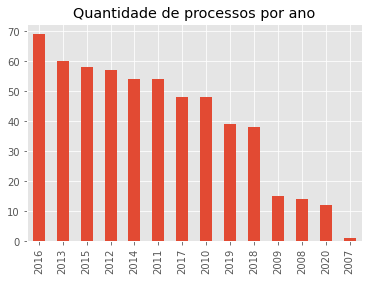

In [ ]:
import matplotlib.pyplot as plt

data_src['Ano'].value_counts().plot.bar()
plt.title('Quantidade de processos por ano')
plt.show()

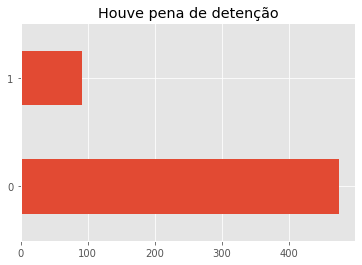

In [ ]:
data_src['Detencao'].value_counts().plot.barh()
plt.title('Houve pena de detenção')
plt.show()

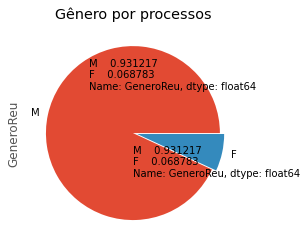

In [ ]:
data_src['GeneroReu'].value_counts().plot.pie(explode=(0.0, 0.05))
plt.text(-0.5,0.5,str(data_src['GeneroReu'].value_counts('M')),)
plt.text(0,-0.5,str(data_src['GeneroReu'].value_counts('F')))
plt.title('Gênero por processos')
plt.show()

# Transformação para treinamento em ML

normalização

In [ ]:
for col in data_src:
    print(col, ':', data_src[col].unique())

Ano : [2010 2011 2012 2013 2014 2015 2016 2019 2018 2008 2020 2017 2009 2007]
GeneroReu : ['M' 'F']
Reclusao : [0 1]
ReclusaoDias : [   0  720  540  480  780 1440 1050 1260 1920 1800 3286  900 2340 1980
  450  840  990 2240 1560 2520 1080 3960 2700  360  420 2460  150 1710
 2400 3000 2160 1350 2970 2880  225  180 1520 3120  240 2040  120 1620
 4800 2592 2268 3840  570 2070 2640 2765 1530  630 2800 2706  746 3400
  960  880 1200  270  750 2560 1500 2100 1680 1890 1950 1575 1650 1625
 2730 2639 2682  300 1822 2430 5760 3920 1125 4680  600  810 2310 1120
 3528 3600 3060 1400 5204 9750 1792 1190  660  560 2025 1461 1138 4410
 5400 3986 2688  760  640  673 1930 6030 4320 7920 5040 2598 1170 3151
 1830  432 6143  685 4080   90 1380 6960 2300 5265 2280 1290 1280 1181
 6120 2550 1740  855 5940 1140  800 7560 1020 1728 3150 6480 2760]
Detencao : [1 0]
DetencaoDias : [   0   90  120  325  300   60  240   30   75  720   15  360  100  180
  123  960  140  540 1560  150 1140  480 1500  270  900   1

In [ ]:
scaler = MinMaxScaler()

data_src['Ano-norm'] = scaler.fit_transform(data_src[['Ano']])

data_src['ReclusaoDias-norm'] = scaler.fit_transform(data_src[['ReclusaoDias']])

data_src['MultaDias-norm'] = scaler.fit_transform(data_src[['MultaDias']])

data_src['DetencaoDias-norm'] = scaler.fit_transform(data_src[['DetencaoDias']])

In [ ]:
data_src.drop(columns=['Ano','ReclusaoDias','MultaDias','DetencaoDias'], inplace=True)

In [ ]:
# transformar atributos categóricos
data_src = pd.get_dummies(data_src, columns=['GeneroReu'])

In [ ]:
data_src = pd.get_dummies(data_src, columns=['RegimeInicial'])

In [ ]:
data_src = pd.get_dummies(data_src, columns=['TipoPenal'])

In [ ]:
data_src.tail()

,Reclusao,Detencao,Multa,CulpabCirc,AntecedCirc,CondSocialCirc,PersonCirc,MotivosCirc,CircCrimeCirc,ConseqCrimeCirc,ComportVitimaCirc,CircReincidencia,PenaMinLegal,Ano-norm,ReclusaoDias-norm,MultaDias-norm,DetencaoDias-norm,GeneroReu_F,GeneroReu_M,RegimeInicial_Aberto,RegimeInicial_Fechado,RegimeInicial_Não declarado,RegimeInicial_Semi-Aberto,TipoPenal_CP-109,TipoPenal_CP-121,TipoPenal_CP-121-ECA-244,TipoPenal_CP-129,TipoPenal_CP-129-157,TipoPenal_CP-139,TipoPenal_CP-140,TipoPenal_CP-146,TipoPenal_CP-147,TipoPenal_CP-155,TipoPenal_CP-155-14,TipoPenal_CP-155-ECA-244,TipoPenal_CP-155eCP-171,TipoPenal_CP-157,TipoPenal_CP-157-14,TipoPenal_CP-157-14-ECA-244,TipoPenal_CP-157-180,...,TipoPenal_CP-312,TipoPenal_CP-313,TipoPenal_CP-317,TipoPenal_CP-333,TipoPenal_CP-342,TipoPenal_CP-71,TipoPenal_CP-71-312,TipoPenal_CTB-298-306,TipoPenal_CTB-300,TipoPenal_CTB-302,TipoPenal_CTB-302-303,TipoPenal_CTB-302-305,TipoPenal_CTB-303,TipoPenal_CTB-306,TipoPenal_CTB-306-309,TipoPenal_CTB-309,TipoPenal_CTB-310,TipoPenal_CTB-311,TipoPenal_ECA-244,TipoPenal_Lei10741-102,TipoPenal_Lei10826-12,TipoPenal_Lei10826-14,TipoPenal_Lei10826-14-ECA-244,TipoPenal_Lei10826-14eLei9503-306,TipoPenal_Lei10826-15,TipoPenal_Lei10826-16,TipoPenal_Lei10826-17,TipoPenal_Lei11343-28,TipoPenal_Lei11343-33,TipoPenal_Lei11343-33eLei10826-12,TipoPenal_Lei11343-33eLei10826-13,TipoPenal_Lei11343-33eLei10826-14,TipoPenal_Lei11343-33eLei10826-15,TipoPenal_Lei12850-2,TipoPenal_Lei6368-12,TipoPenal_Lei7347-10,TipoPenal_Lei8137-1,TipoPenal_Lei8368-12,TipoPenal_Lei8666-89,TipoPenal_Lei9455-1
876,1,0,0,0,0,0,0,1,0,0,1,0,0,0.538462,0.516923,0.000000,0.000000,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
877,0,1,0,0,0,0,0,0,0,0,0,0,1,0.923077,0.000000,0.000000,0.115385,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
878,1,0,1,0,0,0,0,0,0,0,0,0,1,0.461538,0.073846,0.008333,0.000000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
879,1,0,1,0,0,0,0,0,1,1,0,0,0,0.461538,0.283077,0.017500,0.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
880,1,0,1,0,0,0,0,0,0,0,0,0,0,0.615385,0.123077,0.006667,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.options.display.max_rows=95
data_src.isnull().sum()

Reclusao                             0
Detencao                             0
Multa                                0
CulpabCirc                           0
AntecedCirc                          0
CondSocialCirc                       0
PersonCirc                           0
MotivosCirc                          0
CircCrimeCirc                        0
ConseqCrimeCirc                      0
ComportVitimaCirc                    0
CircReincidencia                     0
PenaMinLegal                         0
Ano-norm                             0
ReclusaoDias-norm                    0
MultaDias-norm                       0
DetencaoDias-norm                    0
GeneroReu_F                          0
GeneroReu_M                          0
RegimeInicial_Aberto                 0
RegimeInicial_Fechado                0
RegimeInicial_Não declarado          0
RegimeInicial_Semi-Aberto            0
TipoPenal_CP-109                     0
TipoPenal_CP-121                     0
TipoPenal_CP-121-ECA-244 

In [ ]:
data_src.shape

(567, 94)

In [ ]:
data_src.describe()

,Reclusao,Detencao,Multa,CulpabCirc,AntecedCirc,CondSocialCirc,PersonCirc,MotivosCirc,CircCrimeCirc,ConseqCrimeCirc,ComportVitimaCirc,CircReincidencia,PenaMinLegal,Ano-norm,ReclusaoDias-norm,MultaDias-norm,DetencaoDias-norm,GeneroReu_F,GeneroReu_M,RegimeInicial_Aberto,RegimeInicial_Fechado,RegimeInicial_Não declarado,RegimeInicial_Semi-Aberto,TipoPenal_CP-109,TipoPenal_CP-121,TipoPenal_CP-121-ECA-244,TipoPenal_CP-129,TipoPenal_CP-129-157,TipoPenal_CP-139,TipoPenal_CP-140,TipoPenal_CP-146,TipoPenal_CP-147,TipoPenal_CP-155,TipoPenal_CP-155-14,TipoPenal_CP-155-ECA-244,TipoPenal_CP-155eCP-171,TipoPenal_CP-157,TipoPenal_CP-157-14,TipoPenal_CP-157-14-ECA-244,TipoPenal_CP-157-180,...,TipoPenal_CP-312,TipoPenal_CP-313,TipoPenal_CP-317,TipoPenal_CP-333,TipoPenal_CP-342,TipoPenal_CP-71,TipoPenal_CP-71-312,TipoPenal_CTB-298-306,TipoPenal_CTB-300,TipoPenal_CTB-302,TipoPenal_CTB-302-303,TipoPenal_CTB-302-305,TipoPenal_CTB-303,TipoPenal_CTB-306,TipoPenal_CTB-306-309,TipoPenal_CTB-309,TipoPenal_CTB-310,TipoPenal_CTB-311,TipoPenal_ECA-244,TipoPenal_Lei10741-102,TipoPenal_Lei10826-12,TipoPenal_Lei10826-14,TipoPenal_Lei10826-14-ECA-244,TipoPenal_Lei10826-14eLei9503-306,TipoPenal_Lei10826-15,TipoPenal_Lei10826-16,TipoPenal_Lei10826-17,TipoPenal_Lei11343-28,TipoPenal_Lei11343-33,TipoPenal_Lei11343-33eLei10826-12,TipoPenal_Lei11343-33eLei10826-13,TipoPenal_Lei11343-33eLei10826-14,TipoPenal_Lei11343-33eLei10826-15,TipoPenal_Lei12850-2,TipoPenal_Lei6368-12,TipoPenal_Lei7347-10,TipoPenal_Lei8137-1,TipoPenal_Lei8368-12,TipoPenal_Lei8666-89,TipoPenal_Lei9455-1
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.00000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,...,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,0.869489,0.160494,0.828924,0.361552,0.162257,0.178131,0.119929,0.160494,0.243386,0.179894,0.132275,0.176367,0.266314,0.547280,0.146930,0.063499,0.033462,0.068783,0.931217,0.472663,0.248677,0.022928,0.255732,0.001764,0.07231,0.001764,0.024691,0.001764,0.001764,0.001764,0.003527,0.012346,0.132275,0.012346,0.003527,0.001764,0.245150,0.022928,0.001764,0.001764,...,0.001764,0.001764,0.001764,0.003527,0.003527,0.001764,0.003527,0.001764,0.001764,0.010582,0.005291,0.001764,0.001764,0.024691,0.001764,0.001764,0.001764,0.001764,0.003527,0.001764,0.022928,0.075838,0.001764,0.001764,0.015873,0.029982,0.001764,0.001764,0.109347,0.005291,0.001764,0.001764,0.001764,0.001764,0.001764,0.001764,0.001764,0.001764,0.003527,0.001764
std,0.337163,0.367388,0.376908,0.480874,0.369012,0.382960,0.325166,0.367388,0.429505,0.384438,0.339089,0.381469,0.442421,0.234132,0.143194,0.139819,0.123332,0.253308,0.253308,0.499693,0.432628,0.149805,0.436657,0.041996,0.25923,0.041996,0.155320,0.041996,0.041996,0.041996,0.059339,0.110521,0.339089,0.110521,0.059339,0.041996,0.430556,0.149805,0.041996,0.041996,...,0.041996,0.041996,0.041996,0.059339,0.059339,0.041996,0.059339,0.041996,0.041996,0.102414,0.072611,0.041996,0.041996,0.155320,0.041996,0.041996,0.041996,0.041996,0.059339,0.041996,0.149805,0.264972,0.041996,0.041996,0.125095,0.170689,0.041996,0.041996,0.312350,0.072611,0.041996,0.041996,0.041996,0.041996,0.041996,0.041996,0.041996,0.041996,0.059339,0.041996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

#4. K-Means

aplicação da técnica de kmeans nos dados numéricos

In [ ]:
model = KMeans(n_clusters=3)

model.fit(data_src)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
model.cluster_centers_

array([[ 9.64788732e-01,  6.33802817e-02,  7.88732394e-01,
         4.78873239e-01,  3.02816901e-01,  3.38028169e-01,
         2.46478873e-01,  2.25352113e-01,  2.95774648e-01,
         2.74647887e-01,  1.54929577e-01,  4.22535211e-01,
         7.04225352e-02,  5.21126761e-01,  2.87872878e-01,
         1.42447183e-01,  1.62513543e-02,  7.04225352e-02,
         9.29577465e-01,  7.21644966e-16,  9.92957746e-01,
         7.04225352e-03,  3.33066907e-16,  0.00000000e+00,
         1.61971831e-01,  7.04225352e-03,  7.04225352e-03,
         7.04225352e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.98986399e-17,  3.52112676e-02,
        -3.98986399e-17,  7.04225352e-03,  0.00000000e+00,
         3.52112676e-01,  2.11267606e-02,  0.00000000e+00,
         7.04225352e-03,  1.40845070e-02,  0.00000000e+00,
         0.00000000e+00, -3.64291930e-17,  0.00000000e+00,
        -3.81639165e-17,  7.04225352e-03,  0.00000000e+00,
         7.04225352e-03,  0.00000000e+00,  0.00000000e+0

In [ ]:
distance = model.fit_transform(data_src)
distance

array([[2.88212422, 2.90737985, 2.47874275],
       [2.27207077, 2.10518463, 1.2571971 ],
       [2.35225688, 2.35572921, 1.9452187 ],
       ...,
       [2.24816941, 2.06773637, 1.83971376],
       [1.53477451, 1.97002003, 2.1937211 ],
       [1.87358793, 1.66208616, 1.21480545]])

In [ ]:
labels = model.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2,
       1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 2, 1, 0,
       2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2,
       1, 0, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 0, 2,
       2, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 0, 0, 2, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 2,
       1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 0,
       2, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2,
       2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0,
       0, 2, 2, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1,

## Comparando Genero e Detencao/Reclusao

No handles with labels found to put in legend.


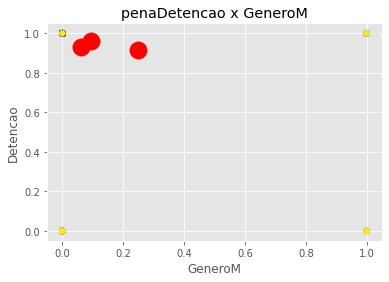

In [ ]:
plt.scatter(data_src[['Detencao']], data_src['GeneroReu_M'], c=model.labels_)
plt.scatter(model.cluster_centers_[:,1], model.cluster_centers_[:, 18], s = 300, c = 'red')
plt.title('penaDetencao x GeneroM')
plt.xlabel('GeneroM')
plt.ylabel('Detencao')
plt.legend()

plt.show()

No handles with labels found to put in legend.


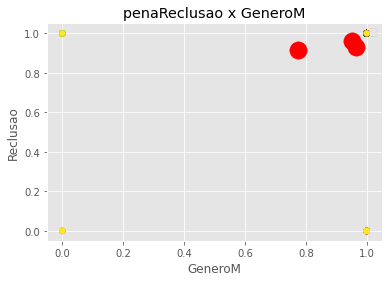

In [ ]:
plt.scatter(data_src[['Reclusao']], data_src['GeneroReu_M'], c=model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 18], s = 300, c = 'red')
plt.title('penaReclusao x GeneroM')
plt.xlabel('GeneroM')
plt.ylabel('Reclusao')
plt.legend()

plt.show()

No handles with labels found to put in legend.


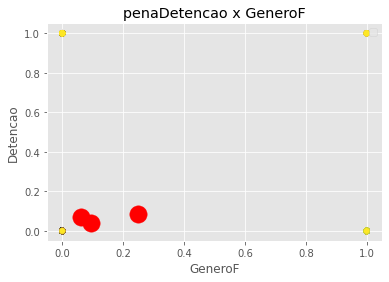

In [ ]:
plt.scatter(data_src[['Detencao']], data_src['GeneroReu_F'], c=model.labels_)
plt.scatter(model.cluster_centers_[:,1], model.cluster_centers_[:, 17], s = 300, c = 'red')
plt.title('penaDetencao x GeneroF')
plt.xlabel('GeneroF')
plt.ylabel('Detencao')
plt.legend()

plt.show()

No handles with labels found to put in legend.


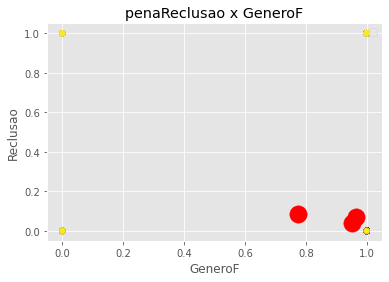

In [ ]:
plt.scatter(data_src[['Reclusao']], data_src['GeneroReu_F'], c=model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 17], s = 300, c = 'red')
plt.title('penaReclusao x GeneroF')
plt.xlabel('GeneroF')
plt.ylabel('Reclusao')
plt.legend()

plt.show()

## Comparando 

In [ ]:
plt.scatter(data_src[['Detencao']], data_src['GeneroReu_M'], c=model.labels_)
plt.scatter(model.cluster_centers_[:,1], model.cluster_centers_[:, 18], s = 300, c = 'red')
plt.title('penaDetencao x GeneroM')
plt.xlabel('GeneroM')
plt.ylabel('Detencao')
plt.legend()

plt.show()